<a href="https://colab.research.google.com/github/seenu384/CognoRise-InfoTech-/blob/main/CognoRise3_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/data (5).csv')
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [5]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [6]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [8]:
df.drop(['date','street','city','statezip','country'],axis=1,inplace=True)

In [9]:
print(f" the highest price {df['price'].max()}")
print(f" Lowest price {df['price'][df.price>0].min()}")

 the highest price 26590000.0
 Lowest price 7800.0


['bedrooms', 'bathrooms', 'sqft_living', 'view', 'sqft_above', 'sqft_basement']


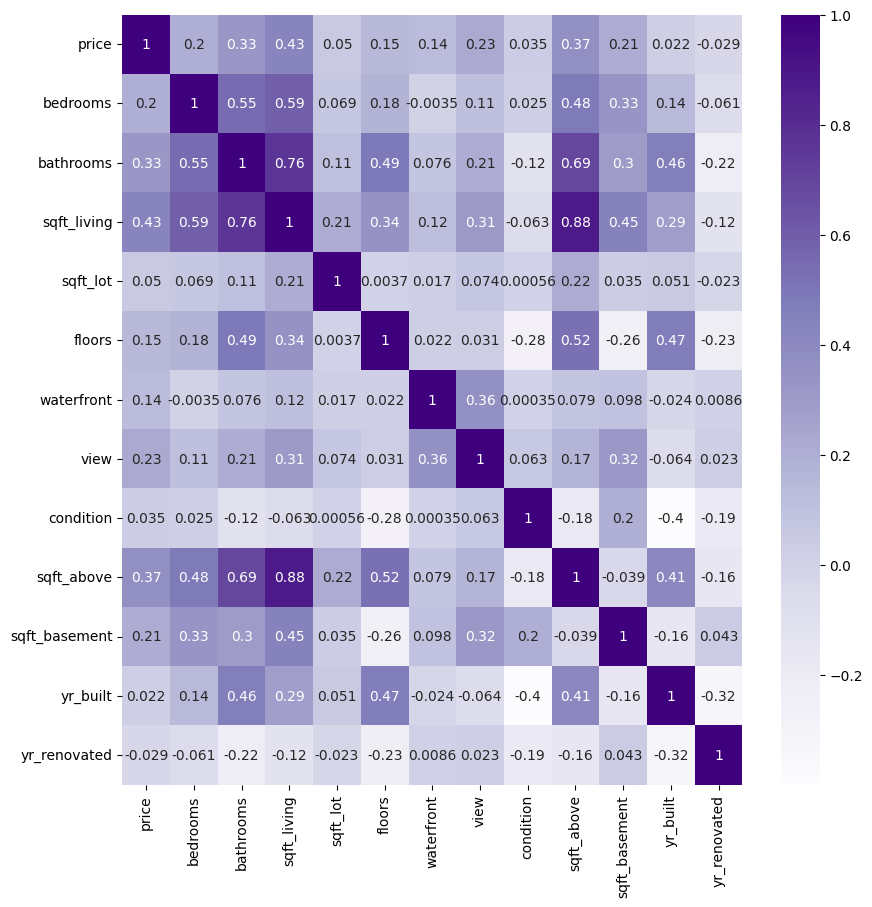

In [13]:
corr_matrix=df.corr(method="pearson")
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True,cmap='Purples')
high_corr_feature=corr_matrix.index[abs(corr_matrix['price'])>=0.2].tolist()
high_corr_feature.remove('price')
print(high_corr_feature)

In [14]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0


In [15]:
x=df[high_corr_feature]
y=df['price']

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.012552,random_state=58)
x_train

,bedrooms,bathrooms,sqft_living,view,sqft_above,sqft_basement
4200,3.0,2.50,2600,1,2600,0
2098,3.0,2.25,2210,0,2210,0
4008,4.0,2.50,2690,0,2690,0
4314,4.0,2.25,1740,0,1170,570
613,3.0,1.00,1390,0,1390,0
...,...,...,...,...,...,...
3840,4.0,3.00,3550,0,2180,1370
3828,4.0,2.25,2940,0,1520,1420
2965,4.0,2.00,1890,0,1890,0
3982,2.0,2.00,1240,0,1240,0


In [17]:
y_train

4200     583000.0
2098     250250.0
4008     645000.0
4314     455000.0
613      319000.0
          ...    
3840     720000.0
3828     605000.0
2965     282000.0
3982     445000.0
3875    1411600.0
Name: price, Length: 4542, dtype: float64

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [19]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
y_pred

array([ 570628.03023552,  441576.59453352,  307846.83904728,
        442732.731809  ,  279974.44398581,  570561.27183825,
        272497.39992306,  654726.49260829,  692125.00109977,
        651340.53190578,  395535.58661074,  374116.1122138 ,
        557649.19770573,  366628.70638695,  545071.13675228,
        657481.66583673,  286655.19709934,  446400.43762383,
        252558.61575573,  506703.92029231,  421091.87901759,
        357348.22236965,  565576.57579641,  302973.13274088,
        284391.58346082,  427812.7343031 ,  530122.37974022,
        677170.91297427, 1299347.78986785,  447418.32821859,
        750328.34903213, 1201076.24835136,  278956.55339105,
        376870.98497947,  475858.27984688,  306933.7053845 ,
        657357.68838632,  538272.0379154 ,  669693.86891153,
        467061.31914349,  408166.13673115, 1808809.62822317,
        297075.30303627,  809265.35808284,  403012.63067349,
        949847.90352017,  447968.68914147,  237147.96079884,
        254594.39694525,

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("Mean Absolute Error is",mean_absolute_error(y_test,y_pred))
print("Mean Squarred Error is",mean_squared_error(y_test,y_pred))
print("R2 Score is",r2_score(y_test,y_pred))
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE is",RMSE)

Mean Absolute Error is 116212.5569052987
Mean Squarred Error is 24470215602.245518
R2 Score is 0.8255269847103488
RMSE is 156429.5867227345


In [21]:
y_test_pre=lr.predict(x_test)
test_acc=r2_score(y_test,y_test_pre)
test_acc

0.8255269847103488

In [22]:
def make_prediction1(input_features1):
  prediction1 = lr.predict(input_features1)
  return prediction1
bedrooms=float(input("Enter Bedrooms :"))
bathrooms=float(input("Enter bathroom:"))
sqft_living= int(input("Enter sqft of living room: "))
view=int(input("Enter view type:"))
sqft_above= int(input("Enter sqft above: "))
sqft_basement= int(input("Enter sqft of basement: "))
input_features1 = [[bedrooms,bathrooms,sqft_living,view,sqft_above,sqft_basement]]
prediction1 = make_prediction1(input_features1)
print("Prediction:", prediction1)

Enter Bedrooms :3
Enter bathroom:1
Enter sqft of living room: 1560
Enter view type:1
Enter sqft above: 1560
Enter sqft of basement: 1000
Prediction: [4.15850149e+08]
